In [1]:
import pandas as pd
from movies_EDA import *

In [2]:
movies = pd.read_csv('movies_preprocessed.csv')
movies.head()

,movieId,title,genres,(no genres listed),Mystery,Animation,Comedy,War,Musical,Horror,...,Documentary,Film-Noir,Romance,Thriller,mean_rating,num_ratings,weighted_rating,tag_soup,year,title_clean
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,0,0,0,...,0,0,0,0,0.777330,68469,0.777122,animated buddymovie cartoon cgi comedy compute...,1995,toy story
1,2,Jumanji,Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,0,0,0,0,0.649317,27143,0.649732,fantasy adaptedfrombook animals badcgi basedon...,1995,jumanji
2,3,Grumpier Old Men,Comedy|Romance,0,0,0,1,0,0,0,...,0,0,1,0,0.634796,15585,0.635700,moldy old annmargaret burgessmeredith darylhan...,1995,grumpier old men
3,4,Waiting to Exhale,Comedy|Drama|Romance,0,0,0,1,0,0,0,...,0,0,1,0,0.574908,2989,0.583135,characters girlmovie characters chickflick bas...,1995,waiting to exhale
4,5,Father of the Bride Part II,Comedy,0,0,0,1,0,0,0,...,0,0,0,0,0.615458,15474,0.616615,stevemartin stevemartin pregnancy remake aging...,1995,father of the bride part ii


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9556 entries, 0 to 9555
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             9556 non-null   int64  
 1   title               9556 non-null   object 
 2   genres              9556 non-null   object 
 3   (no genres listed)  9556 non-null   int64  
 4   Mystery             9556 non-null   int64  
 5   Animation           9556 non-null   int64  
 6   Comedy              9556 non-null   int64  
 7   War                 9556 non-null   int64  
 8   Musical             9556 non-null   int64  
 9   Horror              9556 non-null   int64  
 10  Sci-Fi              9556 non-null   int64  
 11  Adventure           9556 non-null   int64  
 12  Children            9556 non-null   int64  
 13  Action              9556 non-null   int64  
 14  Drama               9556 non-null   int64  
 15  IMAX                9556 non-null   int64  
 16  Crime 

# Visualize genre details

Questions to investigate:
- What genres are most common in this dataset?
- How many genres are movies assigned?
- When movies are assigned more than one genre, is there a correlation between genres that are selected (e.g., romantic comedies)?

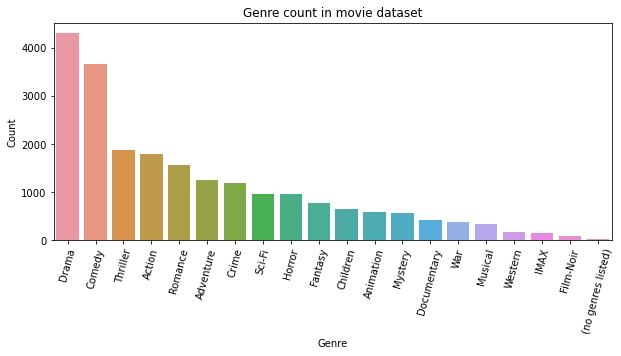

In [4]:
genre_counts_barplot(movies)

Drama and comedy are clearly the most popular genres in this dataset. Very few movies were assigned Western, IMAX, and Film-Noir. The least popular genre is "(no genres listed)" which means there are very few films that do not have any genres assigned. This is a sign that genre can be used to filter data without excluding too many films.

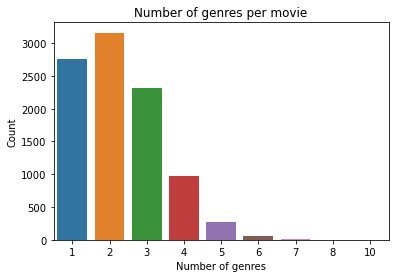

In [5]:
genre_count_per_movie_barplot(movies)

The overwhelming majority of movies was assigned 1-3 genres, with 2 as the mode.

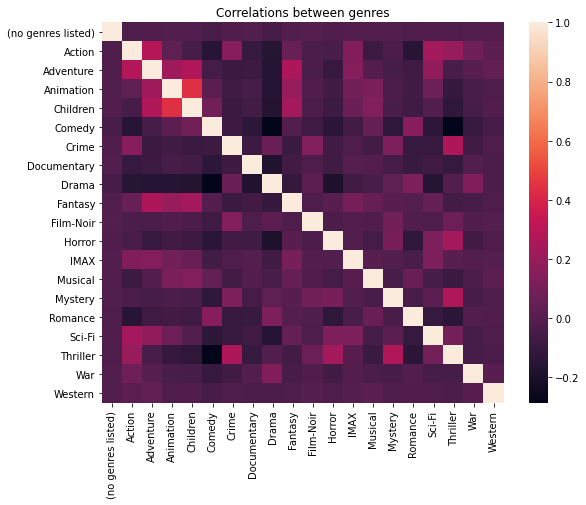

In [6]:
genre_heatmap(movies)

Most of the correlations between assigned genres are weak and unsurprising. Some notable correlations:

|  Root genre|Correlated genres                       |
|-----------:|:---------------------------------------|
|      Action|Adventure, Crime, IMAX, Sci-Fi, Thriller|
|   Animation|Children, Fantasy                       |
|     Fantasy|Adventure, Animation, Children          |
|     Romance|Comedy, Drama                           |
|    Thriller|Action, Crime, Horror, Mystery          |

# Visualize rating details

[IMDb](https://www.imdb.com/) uses a [weighted scoring system](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop) to evaluate each movie's ratings. This rating considers the mean user rating as well as the number of ratings a movie receives. A movie's weighted score, *W*, is given by:

\begin{equation*}
W = R \frac{n_{ratings}}{n_{ratings}+m}
+C \frac{m}{n_{ratings}+m}
\end{equation*}

where *R* is the mean raw rating for the movie, *n<sub>ratings</sub>* is the number of ratings that the movie has, *C* is the mean user rating across all movies, and *m* is the minimum number of ratings needed to be listed in the top rated list. I will use 200 for *m*.

This weighted rating system treats a movie's mean raw rating as more reliable when there are more ratings; otherwise, the weighted rating is pulled toward the mean raw rating across all movies. A weighted system such as this is best when the number of ratings varies widely across movies.

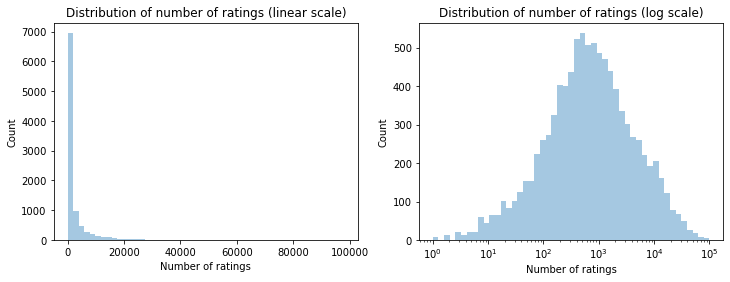

In [7]:
num_ratings_histogram(movies)

The distribution of ratings is broad and roughly log-normal. The typical movie has ~700 ratings, but the number of ratings ranges from 1 to 10<sup>5</sup>.

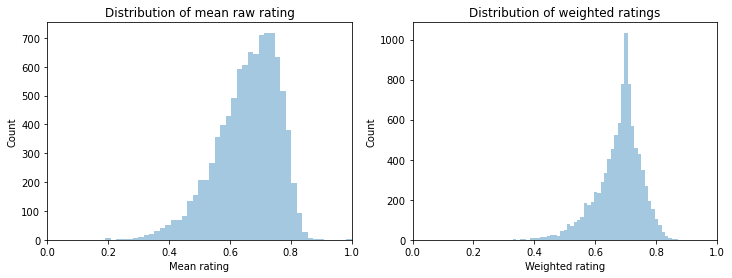

In [8]:
ratings_histogram(movies)

The distribution of weighted ratings is more symmetric than the distribution of mean raw ratings. There is also a clear peak at the mean rating across all movies, likely comprising movies with very few ratings.

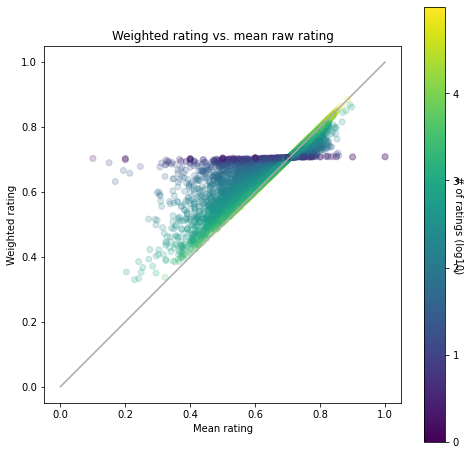

In [9]:
weighted_vs_raw_rating_scatter(movies)

Movies with the most ratings have weighted ratings that are closest to the means of their raw ratings. Movies with fewer ratings have weighted ratings that are pulled toward the overall mean raw rating across all movies. I will use this weighted rating when selecting highest-rated movies in future code.

# Visualize relationship between genre and ratings

Correlations between weighted ratings and genres would elucidate whether some genres of films are generally more highly rated than others.

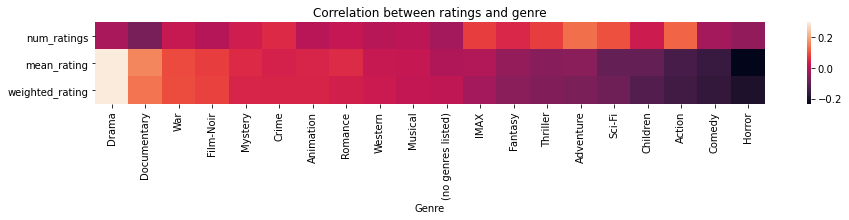

In [10]:
genre_rating_heatmap(movies)

The correlations between genres and ratings are visible but weak. Dramas are generally rated highest, while horror movies are generally rated lowest.

It would seem reasonable that genres with more ratings are generally higher-rated, because presumably more people are watching movies that are liked by others. However, there is no apparent relationship between a genre's number of ratings and its weighted rating. The least-rated genres are at opposite ends of the correlations with ratings (Drama and Documentary are rated highest; Comedy and Horror are rated lowest). The genres with the most ratings (Adventure, Action) are negatively correlated with the weighted rating, meaning they are generally rated lower than the mean rating across all movies. It is worth noting, though, that the correlations between genres and number of ratings are weaker than the already-weak correlations betweeen genres and weighted ratings, so there is likely no relationship between number of ratings and weighted rating.